In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt
import seaborn as sns
%matplotlib inline


In [6]:
epl_df=pd.read_csv('..//input//english-premier-league202021//EPL_20_21.csv')
epl_df.head()

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards
0,Mason Mount,Chelsea,ENG,"MF,FW",21,36,32,2890,6,5,1881,82.3,1,1,0.21,0.24,2,0
1,Edouard Mendy,Chelsea,SEN,GK,28,31,31,2745,0,0,1007,84.6,0,0,0.00,0.00,2,0
2,Timo Werner,Chelsea,GER,FW,24,35,29,2602,6,8,826,77.2,0,0,0.41,0.21,2,0
3,Ben Chilwell,Chelsea,ENG,DF,23,27,27,2286,3,5,1806,78.6,0,0,0.10,0.11,3,0
4,Reece James,Chelsea,ENG,DF,20,32,25,2373,1,2,1987,85.0,0,0,0.06,0.12,3,0


In [5]:
epl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532 entries, 0 to 531
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Name                   532 non-null    object 
 1   Club                   532 non-null    object 
 2   Nationality            532 non-null    object 
 3   Position               532 non-null    object 
 4   Age                    532 non-null    int64  
 5   Matches                532 non-null    int64  
 6   Starts                 532 non-null    int64  
 7   Mins                   532 non-null    int64  
 8   Goals                  532 non-null    int64  
 9   Assists                532 non-null    int64  
 10  Passes_Attempted       532 non-null    int64  
 11  Perc_Passes_Completed  532 non-null    float64
 12  Penalty_Goals          532 non-null    int64  
 13  Penalty_Attempted      532 non-null    int64  
 14  xG                     532 non-null    float64
 15  xA    

In [6]:
epl_df.describe()

,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards
count,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000
mean,25.500000,19.535714,15.714286,1411.443609,1.853383,1.287594,717.750000,77.823872,0.191729,0.234962,0.113289,0.072650,2.114662,0.090226
std,4.319404,11.840459,11.921161,1043.171856,3.338009,2.095191,631.372522,13.011631,0.850881,0.975818,0.148174,0.090072,2.269094,0.293268
min,16.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,9.000000,4.000000,426.000000,0.000000,0.000000,171.500000,73.500000,0.000000,0.000000,0.010000,0.000000,0.000000,0.000000
50%,26.000000,21.000000,15.000000,1345.000000,1.000000,0.000000,573.500000,79.200000,0.000000,0.000000,0.060000,0.050000,2.000000,0.000000
75%,29.000000,30.000000,27.000000,2303.500000,2.000000,2.000000,1129.500000,84.625000,0.000000,0.000000,0.150000,0.110000,3.000000,0.000000
max,38.000000,38.000000,38.000000,3420.000000,23.000000,14.000000,3214.000000,100.000000,9.000000,10.000000,1.160000,0.900000,12.000000,2.000000


In [7]:
epl_df['MinsPerMatch']=(epl_df['Mins']/epl_df['Matches']).astype(int)
epl_df['GoalsPerMatch']=(epl_df['Goals']/epl_df['Matches']).astype(float)
epl_df.head()

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards,MinsPerMatch,GoalsPerMatch
0,Mason Mount,Chelsea,ENG,"MF,FW",21,36,32,2890,6,5,1881,82.3,1,1,0.21,0.24,2,0,80,0.166667
1,Edouard Mendy,Chelsea,SEN,GK,28,31,31,2745,0,0,1007,84.6,0,0,0.00,0.00,2,0,88,0.000000
2,Timo Werner,Chelsea,GER,FW,24,35,29,2602,6,8,826,77.2,0,0,0.41,0.21,2,0,74,0.171429
3,Ben Chilwell,Chelsea,ENG,DF,23,27,27,2286,3,5,1806,78.6,0,0,0.10,0.11,3,0,84,0.111111
4,Reece James,Chelsea,ENG,DF,20,32,25,2373,1,2,1987,85.0,0,0,0.06,0.12,3,0,74,0.031250


In [8]:
#Total Goals
TotalGoals=epl_df['Goals'].sum()
print(TotalGoals)

986


In [9]:
#penalty goals
Total_PenaltyGoals=epl_df['Penalty_Goals'].sum()
print(Total_PenaltyGoals)

102


In [10]:
#Penalty_Attempts
Total_PenaltyAttempts=epl_df['Penalty_Attempted'].sum()
print(Total_PenaltyAttempts)

125


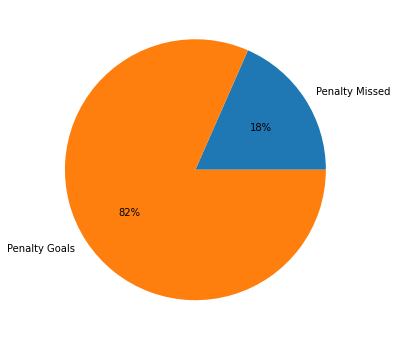

In [11]:
#creating pie chart 

plt.figure(figsize=(13,6))
pl_not_scored= epl_df['Penalty_Attempted'].sum()- Total_PenaltyGoals
data= [pl_not_scored,Total_PenaltyGoals]
labels= ["Penalty Missed","Penalty Goals"]
color=sns.color_palette('tab10')
plt.pie(data,labels=labels,colors=color, autopct="%.0f%%")
plt.show()

In [12]:
epl_df["Position"].unique()


array(['MF,FW', 'GK', 'FW', 'DF', 'MF', 'FW,MF', 'FW,DF', 'DF,MF',
       'MF,DF', 'DF,FW'], dtype=object)

In [13]:
# total fw
epl_df[epl_df['Position']== 'FW' ]

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards,MinsPerMatch,GoalsPerMatch
2,Timo Werner,Chelsea,GER,FW,24,35,29,2602,6,8,826,77.2,0,0,0.41,0.21,2,0,74,0.171429
16,Tammy Abraham,Chelsea,ENG,FW,22,22,12,1040,6,1,218,68.3,0,0,0.56,0.07,0,0,47,0.272727
19,Olivier Giroud,Chelsea,FRA,FW,33,17,8,748,4,0,217,74.2,0,0,0.58,0.09,1,0,44,0.235294
23,Ruben Loftus-Cheek,Chelsea,ENG,FW,24,1,1,60,0,0,16,68.8,0,0,0.00,0.00,0,0,60,0.000000
30,Raheem Sterling,Manchester City,ENG,FW,25,31,28,2536,10,7,1127,85.4,0,1,0.43,0.17,4,0,81,0.322581
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
516,Oliver Burke,Sheffield United,SCO,FW,23,25,14,1269,1,1,262,70.6,0,0,0.17,0.13,2,0,50,0.040000
518,Oliver McBurnie,Sheffield United,SCO,FW,24,23,12,1324,1,0,426,62.9,0,0,0.21,0.07,2,0,57,0.043478
519,Rhian Brewster,Sheffield United,ENG,FW,20,27,12,1128,0,0,225,69.3,0,0,0.14,0.13,1,0,41,0.000000
523,Billy Sharp,Sheffield United,ENG,FW,34,16,7,735,3,0,123,69.9,2,2,0.33,0.07,1,0,45,0.187500


In [14]:
np.size((epl_df['Nationality'].unique()))

59

<AxesSubplot:xlabel='Nationality'>

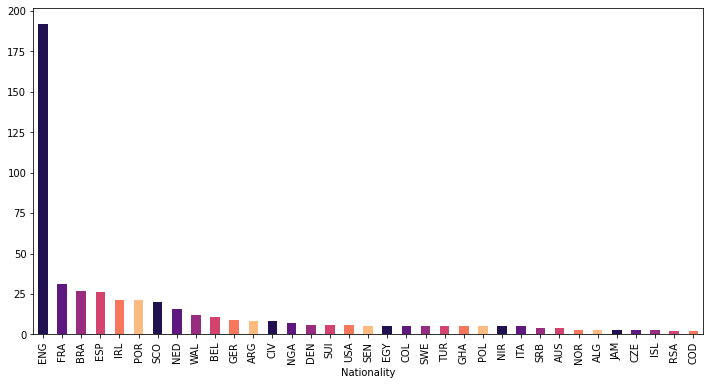

In [15]:
# Most players from each country
nationality=epl_df.groupby('Nationality').size().sort_values(ascending=False)
nationality.head(35).plot(kind='bar',figsize=(12,6),color=sns.color_palette("magma"))

<AxesSubplot:>

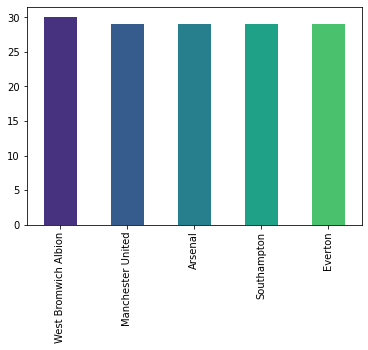

In [16]:
# CLUBS WITH MAXIMUM PLAYERS IN THE SQUAD
epl_df['Club'].value_counts().nlargest(5).plot(kind='bar',color=sns.color_palette("viridis"))

<AxesSubplot:>

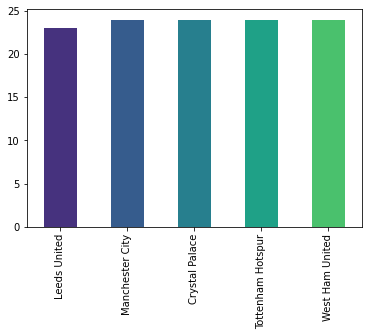

In [17]:
#club with least players in the squad
epl_df['Club'].value_counts().nsmallest(5).plot(kind='bar',color=sns.color_palette("viridis"))



In [18]:
#players based on age group
under20=epl_df[epl_df["Age"]<=20]
age20_25=epl_df[(epl_df['Age']>20) & (epl_df["Age"]<=25)]
age25_30=epl_df[(epl_df['Age']>25) & (epl_df["Age"]<=30)]
Above30=epl_df[epl_df['Age']>30]


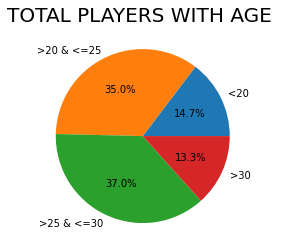

In [19]:
x=np.array([under20['Name'].count(),age20_25['Name'].count(),age25_30['Name'].count(),Above30['Name'].count()])
my_labels=['<20','>20 & <=25','>25 & <=30' , '>30']
plt.title("TOTAL PLAYERS WITH AGE ",fontsize=20)
plt.pie(x,labels=my_labels, autopct="%.1f%%")
plt.show()


<AxesSubplot:>

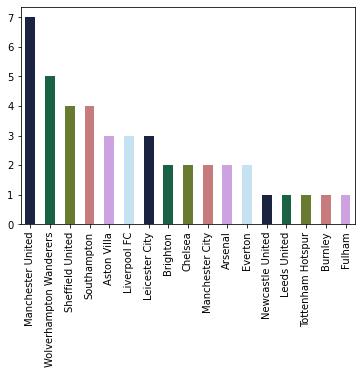

In [20]:
# Total Under 20 Players each club
Players_Under20=epl_df[epl_df['Age']<20]
Players_Under20['Club'].value_counts().plot(kind='bar',color=sns.color_palette("cubehelix"))


In [21]:
# Under 20 players in ManCity
Players_Under20[Players_Under20["Club"]=='Manchester City']

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards,MinsPerMatch,GoalsPerMatch
47,Eric García,Manchester City,ESP,DF,19,6,3,383,0,0,344,93.6,0,0,0.03,0.02,0,0,63,0.0
50,Liam Delap,Manchester City,ENG,FW,17,1,0,40,0,0,7,71.4,0,0,0.06,0.00,0,0,40,0.0


In [22]:
# Under 20 players in Chelsea
Players_Under20[Players_Under20["Club"]=='Chelsea']

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards,MinsPerMatch,GoalsPerMatch
18,Callum Hudson-Odoi,Chelsea,ENG,"FW,DF",19,23,10,1059,2,3,659,82.2,0,0,0.12,0.26,0,0,46,0.086957
21,Billy Gilmour,Chelsea,SCO,MF,19,5,3,261,0,0,215,89.3,0,0,0.01,0.04,0,0,52,0.000000


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'Chelsea'),
  Text(1, 0, 'Manchester City'),
  Text(2, 0, 'Manchester United'),
  Text(3, 0, 'Liverpool FC'),
  Text(4, 0, 'Leicester City'),
  Text(5, 0, 'West Ham United'),
  Text(6, 0, 'Tottenham Hotspur'),
  Text(7, 0, 'Arsenal'),
  Text(8, 0, 'Leeds United'),
  Text(9, 0, 'Everton'),
  Text(10, 0, 'Aston Villa'),
  Text(11, 0, 'Newcastle United'),
  Text(12, 0, 'Wolverhampton Wanderers'),
  Text(13, 0, 'Crystal Palace'),
  Text(14, 0, 'Southampton'),
  Text(15, 0, 'Brighton'),
  Text(16, 0, 'Burnley'),
  Text(17, 0, 'Fulham'),
  Text(18, 0, 'West Bromwich Albion'),
  Text(19, 0, 'Sheffield United')])

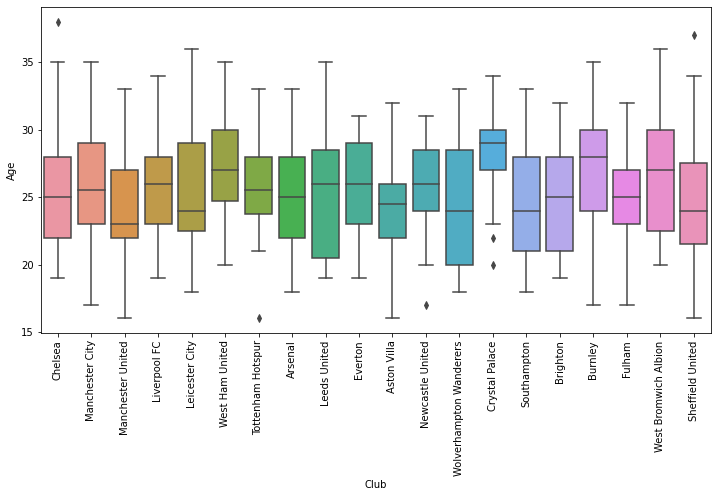

In [23]:
# Average age of players in each club
plt.figure(figsize=(12,6))
sns.boxplot(x='Club' , y='Age' , data=epl_df )
plt.xticks(rotation=90)

In [24]:
num_player=epl_df.groupby('Club').size()
data=(epl_df.groupby('Club')['Age'].sum())/num_player
data.sort_values(ascending=False)



Club
Crystal Palace             28.333333
West Ham United            27.500000
Burnley                    27.040000
West Bromwich Albion       26.766667
Newcastle United           26.074074
Manchester City            25.708333
Tottenham Hotspur          25.625000
Chelsea                    25.592593
Leicester City             25.592593
Liverpool FC               25.571429
Everton                    25.413793
Leeds United               25.347826
Fulham                     25.035714
Arsenal                    24.965517
Sheffield United           24.814815
Brighton                   24.555556
Wolverhampton Wanderers    24.444444
Aston Villa                24.291667
Southampton                24.137931
Manchester United          23.862069
dtype: float64

Text(0.5, 1.0, 'Plot of Clubs vs Total Assist')

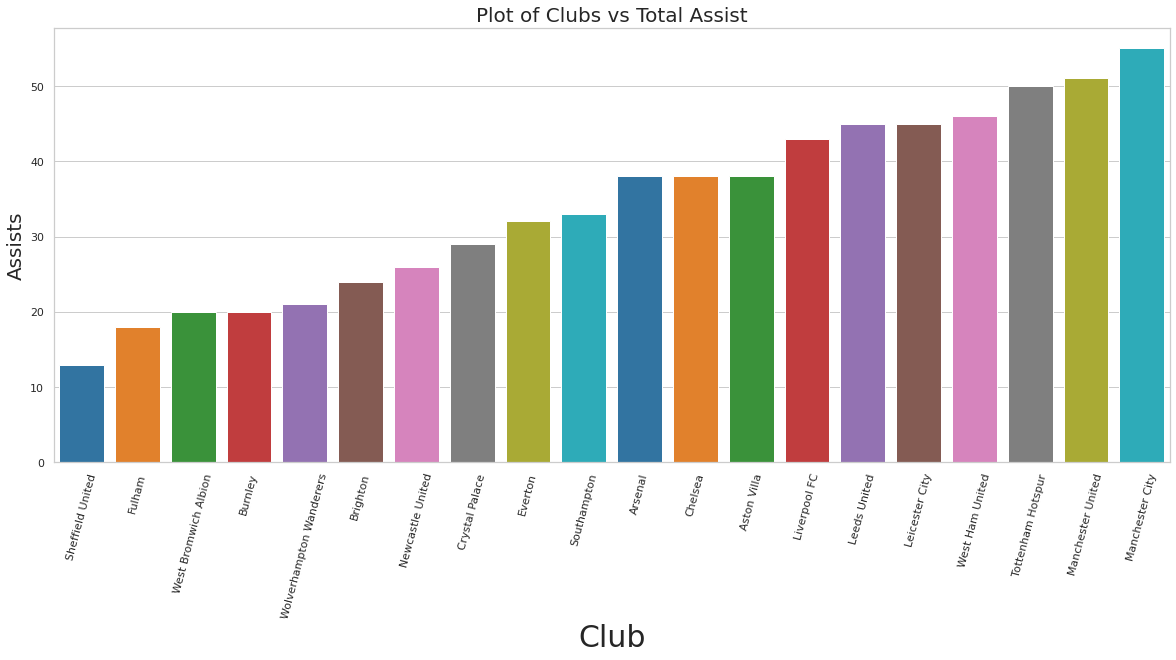

In [33]:
Assists_by_clubs=pd.DataFrame(epl_df.groupby('Club',as_index=False)['Assists'].sum())
sns.set_theme(style='whitegrid',color_codes=True)
ax=sns.barplot(x='Club',y='Assists',data=Assists_by_clubs.sort_values(by="Assists"),palette='tab10')
ax.set_xlabel("Club",fontsize=30)
ax.set_ylabel("Assists",fontsize=20)
plt.xticks(rotation=75)
plt.rcParams["figure.figsize"]=(20,8)
plt.title('Plot of Clubs vs Total Assist',fontsize=20)




In [34]:
# Top 10 Assists
top_10_assists=epl_df[['Name','Club','Assists','Matches']].nlargest(n=10,columns='Assists')
top_10_assists

,Name,Club,Assists,Matches
162,Harry Kane,Tottenham Hotspur,14,35
34,Kevin De Bruyne,Manchester City,12,25
51,Bruno Fernandes,Manchester United,12,37
161,Son Heung-min,Tottenham Hotspur,10,37
273,Jack Grealish,Aston Villa,10,26
54,Marcus Rashford,Manchester United,9,37
110,Jamie Vardy,Leicester City,9,34
220,Raphael Dias Belloli,Leeds United,9,30
2,Timo Werner,Chelsea,8,35
136,Aaron Cresswell,West Ham United,8,36
